# Unit 5 - Financial Planning

In [168]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [169]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [170]:
# Set current amount of crypto assets
my_btc = 1.3
my_eth = 5.3

In [171]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [172]:
# Review API pull for ETH
eth_review = requests.get(eth_url).json()
print(json.dumps(eth_review, indent=3))

{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 120201621,
         "total_supply": 120201621,
         "max_supply": 120201621,
         "quotes": {
            "USD": {
               "price": 1932.56,
               "volume_24h": 8034755942,
               "market_cap": 232467725125,
               "percentage_change_1h": -0.141239277539823,
               "percentage_change_24h": -2.97401470397616,
               "percentage_change_7d": 3.91271076346744,
               "percent_change_1h": -0.141239277539823,
               "percent_change_24h": -2.97401470397616,
               "percent_change_7d": 3.91271076346744
            }
         },
         "last_updated": 1689440380
      }
   },
   "metadata": {
      "timestamp": 1689440380,
      "num_cryptocurrencies": 3119,
      "error": null
   }
}


In [173]:
# Review API pull for BTC
btc_review = requests.get(btc_url).json()
print(json.dumps(btc_review, indent=3))


{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 19430075,
         "total_supply": 19430075,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 30293.0,
               "volume_24h": 13016671301,
               "market_cap": 588674860502,
               "percentage_change_1h": -0.0383574329184942,
               "percentage_change_24h": -2.97684836499887,
               "percentage_change_7d": 0.267862026921193,
               "percent_change_1h": -0.0383574329184942,
               "percent_change_24h": -2.97684836499887,
               "percent_change_7d": 0.267862026921193
            }
         },
         "last_updated": 1689440378
      }
   },
   "metadata": {
      "timestamp": 1689440378,
      "num_cryptocurrencies": 3119,
      "error": null
   }
}


In [174]:
# Fetch current BTC price
my_btc_value = btc_review["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
my_eth_value = eth_review["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * my_btc_value
my_eth_value = my_eth * my_eth_value


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.3 BTC is $39380.90
The current value of your 5.3 ETH is $10242.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [175]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [176]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key =  os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version="v2")

In [177]:
# Format current date as ISO format
current_date = pd.Timestamp("2023-07-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca_api.get_bars(tickers, timeframe, start=current_date, end=current_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_df = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
spy_df = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
portfolio_df = pd.concat([agg_df, spy_df],axis=1, keys=['AGG','SPY'])
portfolio_df.index = portfolio_df.index.date

# Preview DataFrame
portfolio_df

AGG                                                          \
             open     high     low  close   volume trade_count       vwap   
2023-07-11  96.94  97.0999  96.855  97.01  5978762       28609  96.979786   

               SPY                                                            
              open    high     low   close    volume trade_count        vwap  
2023-07-11  440.45  442.97  439.44  442.46  64479814      456582  441.225755

In [178]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df["AGG"]["close"][0]
spy_close_price = portfolio_df["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.01
Current SPY closing price: $442.46


In [179]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22123.00
The current value of your 200 AGG shares is $19402.00


### Savings Health Analysis

In [180]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_shares_value = (my_agg_value) + (my_spy_value)
my_crypto_value = (my_btc_value) + (my_eth_value)

# Create savings DataFrame
savings_data = {
    "Amount": [my_shares_value, my_crypto_value]
}
savings_data_labels = ["Shares", "Crypto"]
df_savings = pd.DataFrame(savings_data, index=savings_data_labels)

# Display savings DataFrame
display(df_savings)

,Amount
Shares,41525.000
Crypto,49623.468


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='Amount'>

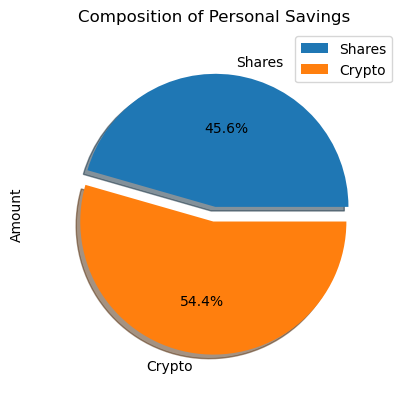

In [181]:
# Plot savings pie chart
df_savings.plot(kind="pie",y="Amount", title="Composition of Personal Savings", autopct='%1.1f%%', radius=.9, shadow=True, explode=[0.05,0.05])

In [182]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_shares_value + my_crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal of establishing an emergency fund.")
elif total_savings < emergency_fund:
    print(f"Uh oh!  You do not have enough money in your savings to establish an emergency fund.  You are ${emergency_fund-total_savings:0.2f} away from your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [183]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-11', tz='America/New_York').isoformat()

In [184]:
# Get 5 years' worth of historical data for SPY and AGG
df_mc_ticker = alpaca_api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
mc_agg_df = df_mc_ticker[df_mc_ticker['symbol']=='AGG'].drop('symbol', axis=1)
mc_spy_df = df_mc_ticker[df_mc_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([mc_agg_df, mc_spy_df],axis=1, keys=['AGG','SPY'])
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2018-07-11  106.33  106.35  106.2200  106.28  5385003       10265  106.271499   
2018-07-12  106.26  106.42  106.2600  106.41  2145797        8401  106.365689   
2018-07-13  106.44  106.52  106.4400  106.51  2235587        9524  106.486794   
2018-07-16  106.35  106.40  106.2434  106.39  2116689        8807  106.343343   
2018-07-17  106.40  106.45  106.2900  106.35  2964110       10450  106.371231   

               SPY                                                             
              open     high     low   close    volume trade_count        vwap  
2018-07-11  277.15  278.040  276.52  276.91  77958543      300427  277.266925  
2018-07-12  278.28  279.430  277.60  279.29  60185206      236263  278.725115  
2018-07-13  279.17  279.930  278.66  279.56  48259487      206152  279.527779  
2018-07-16  279.64  279.803  278.84  279.39  48722138      177350  279.312325  
2018-07-17  278.47  280.910  278.41  280.43  52890500      216883  280.027102

In [185]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [186]:
# Printing the simulation input data
print(MC_stock_data)

In [187]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996490,0.996504,1.003347,1.015243,1.010986,0.989372,0.997964,1.011838,0.989128,1.003338,...,1.002677,1.003713,0.993054,1.010044,0.995390,0.996431,1.003475,1.005764,0.981589,0.995420
2,1.006122,0.989893,1.013995,1.018593,1.018746,0.990459,0.991385,1.010584,0.988636,1.002186,...,0.983236,1.011205,0.990791,1.009449,0.993289,1.005416,0.992502,1.006159,0.992426,1.002548
3,1.019950,1.000159,1.013989,0.998304,1.031880,0.986682,0.980805,1.004760,0.992973,1.005904,...,0.980618,1.001425,0.983897,1.016942,0.984859,1.011434,0.989035,1.005738,0.985599,0.998515
4,1.030984,0.994176,1.024998,1.002062,1.016420,0.989258,0.976842,0.992735,0.990770,0.983055,...,0.973054,0.999385,0.984308,1.012432,0.995902,1.029990,0.979632,0.999297,0.979659,1.004926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.940269,2.721854,13.708526,5.658505,27.223256,5.091952,9.764763,7.173994,4.164618,7.628701,...,17.588528,9.584075,1.523750,17.933572,5.276311,10.025263,15.799205,8.407473,4.864165,8.358368
7557,7.940207,2.711936,13.619793,5.651362,26.942771,5.089933,9.783666,7.259426,4.252745,7.607635,...,17.741743,9.572462,1.524294,17.741187,5.188088,9.997710,15.885875,8.386914,4.863334,8.354143
7558,7.916560,2.733286,13.640087,5.715125,27.095687,5.120138,9.618705,7.360150,4.313349,7.606703,...,17.697492,9.521626,1.516683,17.758478,5.231981,10.080890,15.969120,8.478356,4.919653,8.336017
7559,7.770683,2.720338,13.682464,5.693909,27.224452,5.131675,9.709625,7.253491,4.357600,7.694211,...,17.941960,9.457087,1.497582,17.882507,5.225789,9.891847,16.013454,8.458915,4.933460,8.320268


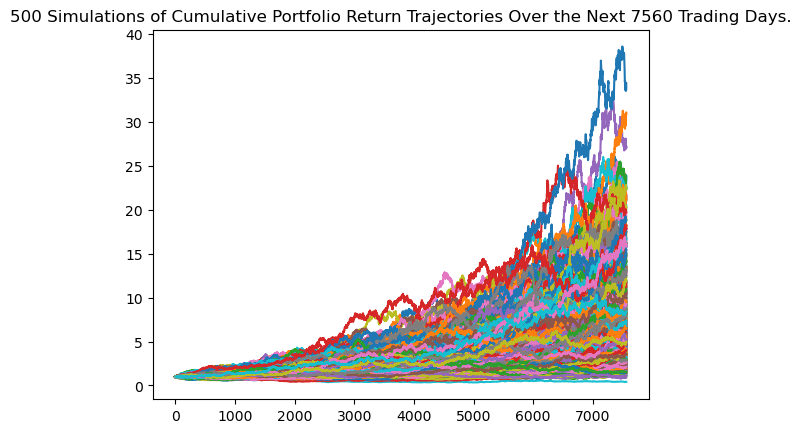

In [188]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

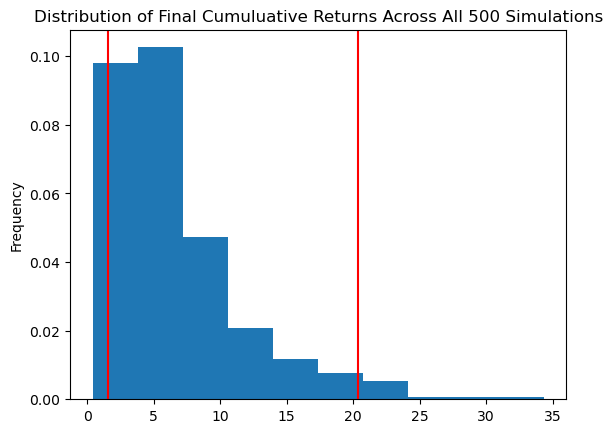

In [189]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()


### Retirement Analysis

In [190]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stock_data.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              6.607409
std               4.931322
min               0.419386
25%               3.079212
50%               5.173517
75%               8.368895
max              34.339808
95% CI Lower      1.533784
95% CI Upper     20.374633
Name: 7560, dtype: float64


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [191]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30675.68 and $407492.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [192]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $46013.53 and $611238.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [193]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data_v2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [194]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data_v2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008520,0.998477,0.999148,1.003829,0.991883,1.008455,1.002416,1.002058,0.999240,1.012180,...,1.000713,1.002125,0.991485,1.012004,1.008551,0.978445,0.992079,0.994233,1.005122,1.008771
2,1.017981,1.010113,0.999901,0.993172,0.998262,1.000715,0.995704,1.011497,1.000320,0.999418,...,1.002117,0.999063,0.987271,1.026820,1.009924,0.979027,0.982303,0.983402,1.013363,1.004133
3,1.022763,1.023502,0.989551,0.976937,1.000638,1.005685,0.989292,1.007037,0.985726,0.995092,...,0.990682,0.992263,0.981903,1.028419,1.004655,0.977144,0.978862,0.989667,1.005208,0.999383
4,1.043383,1.029133,0.978909,0.969705,0.993963,1.015410,0.976504,1.000223,0.995317,0.985079,...,0.992595,0.983620,0.965112,1.036443,0.999480,0.975175,0.966641,0.994388,1.023544,0.998378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.066294,0.995206,1.584231,0.921205,1.157485,0.677853,1.516212,2.020876,1.686558,1.212406,...,1.863827,1.032681,1.799654,1.660020,1.944293,1.816891,0.983650,0.694805,1.298982,1.360406
1257,1.068566,1.006878,1.583193,0.927320,1.163140,0.670863,1.513803,2.028512,1.686935,1.220185,...,1.873030,1.037076,1.779775,1.694278,1.954552,1.817043,0.982581,0.693713,1.308998,1.332186
1258,1.077345,1.021623,1.560950,0.925497,1.159715,0.682411,1.523927,2.027482,1.681514,1.233412,...,1.885227,1.034285,1.766230,1.700450,1.952556,1.802694,0.982919,0.692487,1.323725,1.308856
1259,1.089906,1.020144,1.562143,0.931204,1.161692,0.680067,1.531457,2.009473,1.685480,1.217654,...,1.863641,1.034844,1.796021,1.696726,1.947659,1.790619,0.973679,0.689010,1.335270,1.293905


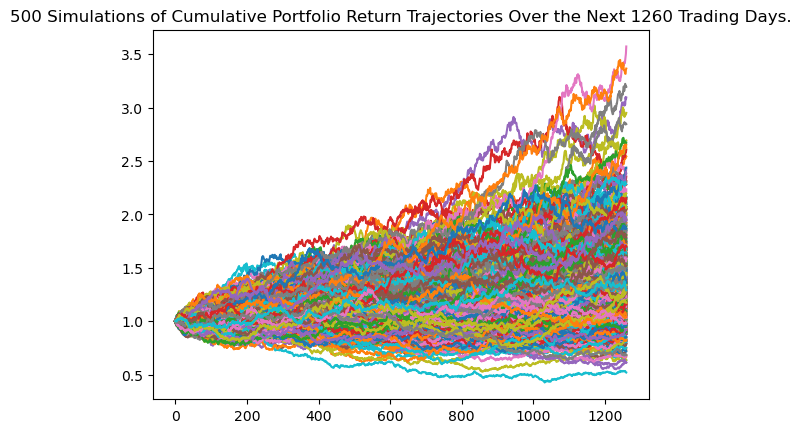

In [195]:
# Plot simulation outcomes
line_plot_2 = MC_stock_data_v2.plot_simulation()

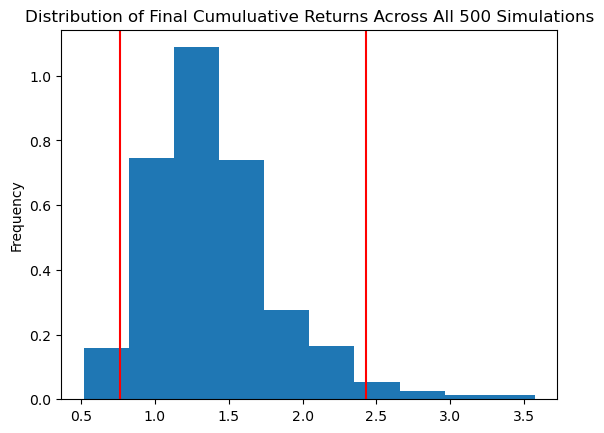

In [196]:
# Plot probability distribution and confidence intervals
dist_plot_2 = MC_stock_data_v2.plot_distribution()


In [197]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_stock_data_v2.summarize_cumulative_return()


# Print summary statistics
print(tbl2)

count           500.000000
mean              1.401323
std               0.435465
min               0.519765
25%               1.107506
50%               1.341176
75%               1.617792
max               3.572480
95% CI Lower      0.766697
95% CI Upper      2.430173
Name: 1260, dtype: float64


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [198]:
# Set initial investment
initial_investment_2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl2[8]*initial_investment_2,2)
ci_upper_five = round(tbl2[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46001.85 and $145810.39


### Ten Years Retirement Option

In [199]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data_v3 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [200]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data_v3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005420,1.006725,0.995496,0.985187,1.003940,1.012724,0.996477,1.000246,1.005300,1.012102,...,0.993552,1.001003,1.006998,0.997768,0.997754,1.007926,0.992689,1.021878,1.008864,1.007122
2,1.009901,1.006289,0.997897,0.986039,1.006607,1.010199,1.008566,0.997860,0.997835,1.018346,...,0.994069,0.991350,1.011797,0.997102,0.998561,1.009506,0.989310,1.032428,1.015546,1.021231
3,1.015958,1.024016,1.000623,0.993514,1.014660,1.002156,1.030325,0.993588,0.992743,1.015254,...,0.998659,0.990639,1.020095,0.998282,1.006184,1.005066,0.988050,1.044644,1.006153,1.040260
4,1.006500,1.025860,1.014102,0.993456,1.008806,0.994482,1.014255,0.997675,0.996298,1.020899,...,0.997869,0.999583,1.028825,1.004317,1.014850,0.993283,0.977622,1.041087,1.001019,1.047481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.270074,0.721900,2.302692,2.109129,2.093141,2.921303,2.638986,1.385324,1.424055,1.482684,...,0.970008,1.169974,2.894638,1.914957,0.590435,1.967062,0.839129,1.126654,0.799063,1.032111
2517,3.270162,0.727022,2.347450,2.083424,2.087480,2.929582,2.611995,1.381546,1.416170,1.511511,...,0.974867,1.165154,2.882743,1.917564,0.590620,1.938641,0.840671,1.137402,0.801642,1.039917
2518,3.274047,0.729322,2.363438,2.093429,2.072982,2.961307,2.613774,1.388429,1.422613,1.510641,...,0.968226,1.181666,2.903393,1.907189,0.589701,1.957781,0.830535,1.137422,0.796280,1.045106
2519,3.302596,0.728886,2.357567,2.087827,2.064456,2.947016,2.625365,1.388597,1.411394,1.510288,...,0.966006,1.183346,2.914741,1.921318,0.588178,1.941439,0.830426,1.141604,0.802113,1.048509


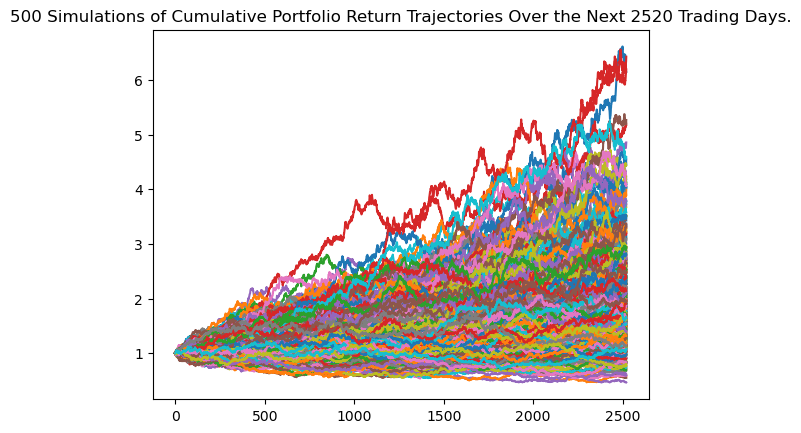

In [201]:
# Plot simulation outcomes
line_plot_3 = MC_stock_data_v3.plot_simulation()

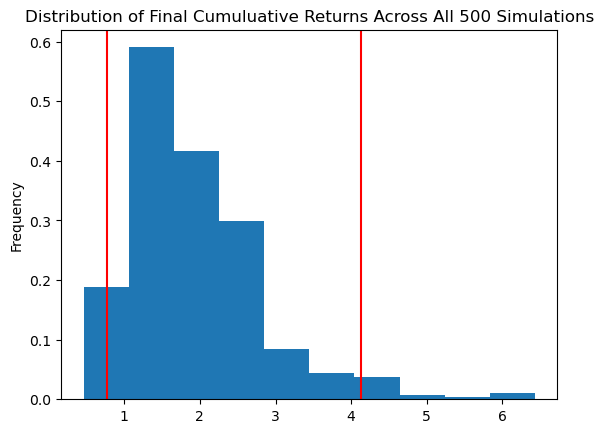

In [202]:
# Plot probability distribution and confidence intervals
dist_plot_3 = MC_stock_data_v3.plot_distribution()

In [203]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              6.607409
std               4.931322
min               0.419386
25%               3.079212
50%               5.173517
75%               8.368895
max              34.339808
95% CI Lower      1.533784
95% CI Upper     20.374633
Name: 7560, dtype: float64


/Users/Dane/Desktop/FinTech Bootcamp/GitHub Homework/Module_5_Challenge/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [204]:
# Set initial investment
initial_investment_3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl3[8] * initial_investment_3,2)
ci_upper_ten = round(tbl3[9] * initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $92027.05 and $1222477.99
